In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Output')

library("readxl")
library(tidyverse)
library(reshape2)

#reading in file
data <- read_excel("CytokineData_102920.xlsx", sheet = 2)
data_df = data.frame(data)

#reading in demographics file
demographics_data_df = data.frame(read_excel("SubjectInfo_102920.xlsx", sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [2]:
#adding demographics data to cytokine df
#could've made my life easier by just using full_join
race = c()
ethnicity = c()
sex = c()
age = c()
BMI = c()
cotinine = c()
for (i in 1:length(data_df$SubjectNo)){
    for(j in 1:length(demographics_data_df$SubjectNo)){
        if (data_df$SubjectNo[i] == demographics_data_df$SubjectNo[j]){
            race = c(race, demographics_data_df$Race[j])
            ethnicity = c(ethnicity, demographics_data_df$Ethnicity[j])
            sex = c(sex, demographics_data_df$Sex[j])
            age = c(age, demographics_data_df$Age[j])
            BMI = c(BMI, demographics_data_df$BMI[j])
            cotinine = c(cotinine, demographics_data_df$Serum_Cotinine[j])
        }
    }
}

data_df$Race = race
data_df$Ethnicity = ethnicity
data_df$Sex = sex
data_df$Age = age
data_df$BMI = BMI
data_df$Cotinine = as.numeric(cotinine)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [3]:
head(data_df)

,Original_Identifier,Protein,Conc,Conc_pslog2,Compartment,SubjectNo,Group,SubjectID,Race,Ethnicity,Sex,Age,BMI,Cotinine
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,E_C_F_002,IFNg,17.642316,4.220509,ELF,1,NS,NS_1,W,NH,F,28,37.67,NA
2,E_C_F_002,IL10,2.873724,1.953721,ELF,1,NS,NS_1,W,NH,F,28,37.67,NA
3,E_C_F_002,IL12p70,1.625272,1.392467,ELF,1,NS,NS_1,W,NH,F,28,37.67,NA
4,E_C_F_002,IL13,36.117692,5.214035,ELF,1,NS,NS_1,W,NH,F,28,37.67,NA
5,E_C_F_002,IL1b,104.409217,6.719857,ELF,1,NS,NS_1,W,NH,F,28,37.67,NA
6,E_C_F_002,IL6,21.159536,4.469856,ELF,1,NS,NS_1,W,NH,F,28,37.67,NA


In [5]:
head(demographics_data_df)

,SubjectNo,Group,SubjectID,Race,Ethnicity,Sex,Age,BMI,Serum_Cotinine
,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,1,NS,NS_1,W,NH,F,28,37.67,NA
2,2,NS,NS_2,O,H,F,33,35.00,NA
3,3,NS,NS_3,W,NH,F,25,18.70,0
4,4,NS,NS_4,W,NH,F,26,23.00,0
5,5,NS,NS_5,As,NH,F,25,24.70,0
6,6,NS,NS_6,AA,NH,F,42,34.60,0


In [4]:
#making race binary between black and non- black subjects
for (i in 1:length(demographics_data_df$Race)){
    if(demographics_data_df$Race[i] != 'AA'){
        demographics_data_df$Race[i] = 'NB'
    }
}

In [13]:
smokers_only = demographics_data_df %>%
 filter(Group != 'NS')

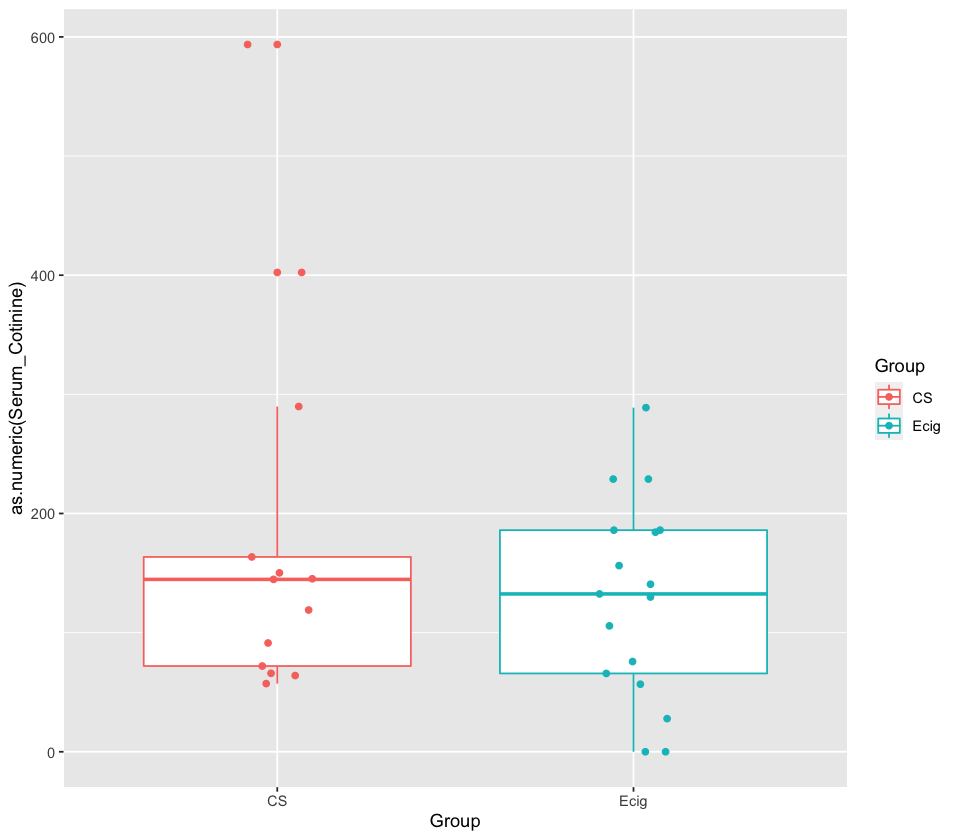

In [10]:
options(repr.plot.width=8, repr.plot.height=7) #changing size
ggplot(data = smokers_only, aes(x = Group, y = as.numeric(Serum_Cotinine))) + 
  geom_boxplot(aes(color = Group)) +
  geom_point(aes(color = Group),position = position_jitter(w = 0.1, h = 0)) 

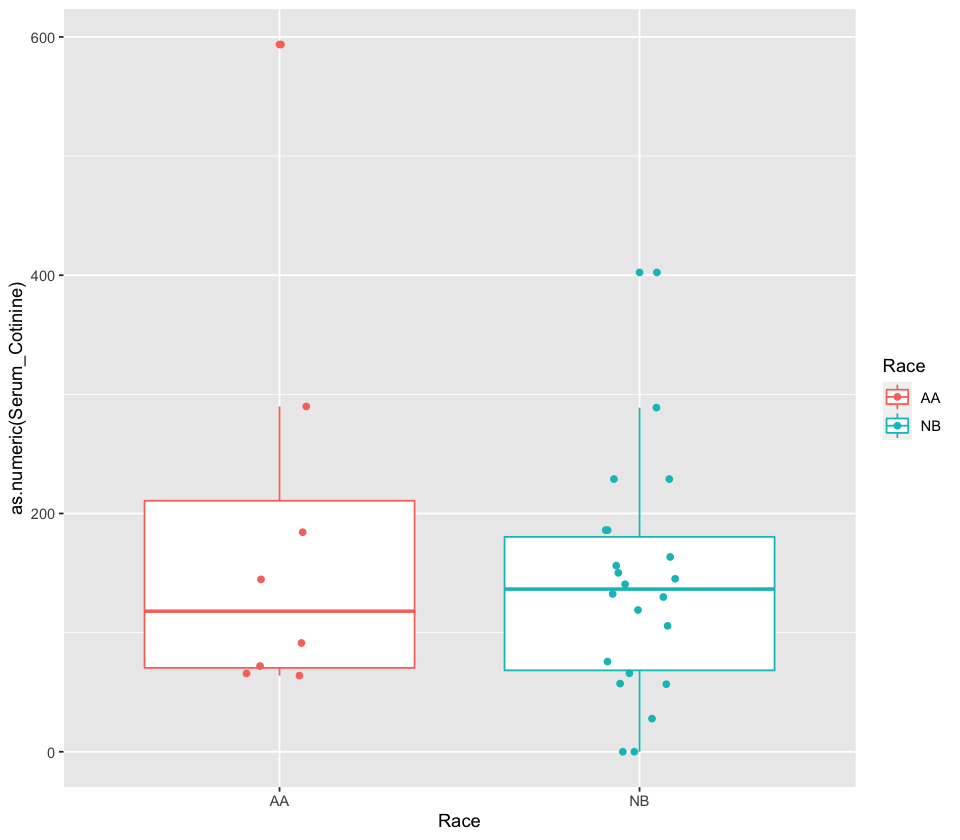

In [14]:
ggplot(data = smokers_only, aes(x = Race, y = as.numeric(Serum_Cotinine))) + 
  geom_boxplot(aes(color = Race)) +
  geom_point(aes(color = Race),position = position_jitter(w = 0.1, h = 0)) 

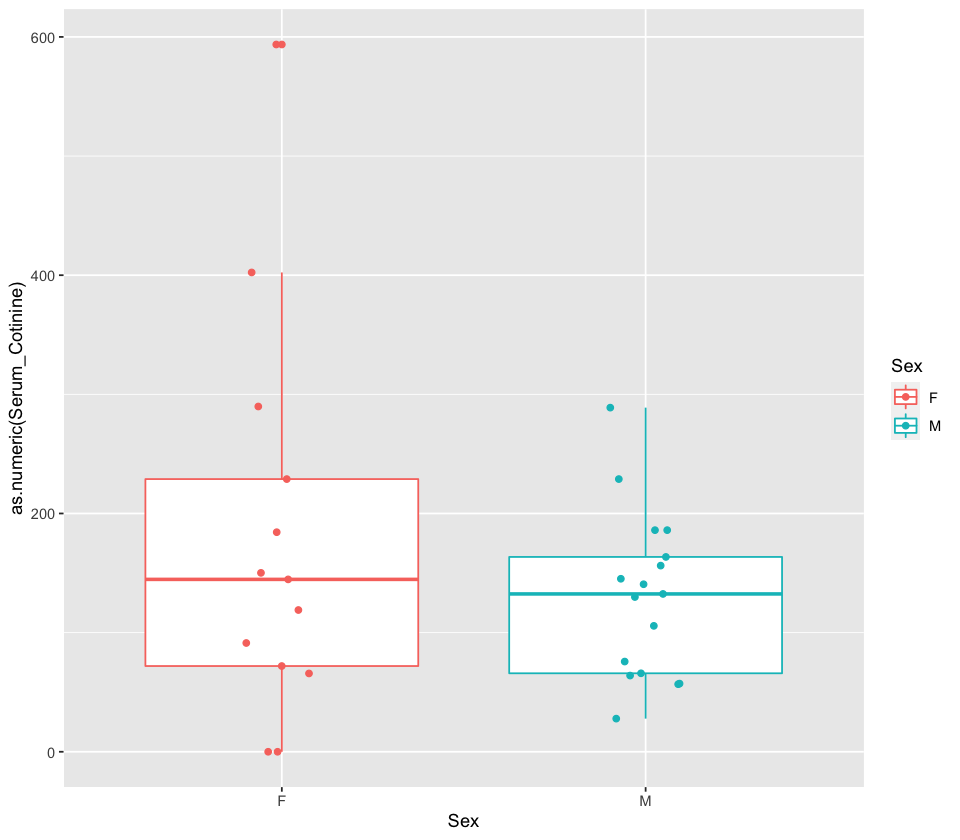

In [17]:
ggplot(data = smokers_only, aes(x = Sex, y = as.numeric(Serum_Cotinine))) + 
  geom_boxplot(aes(color = Sex)) +
  geom_point(aes(color = Sex),position = position_jitter(w = 0.1, h = 0)) 

`geom_smooth()` using formula 'y ~ x'



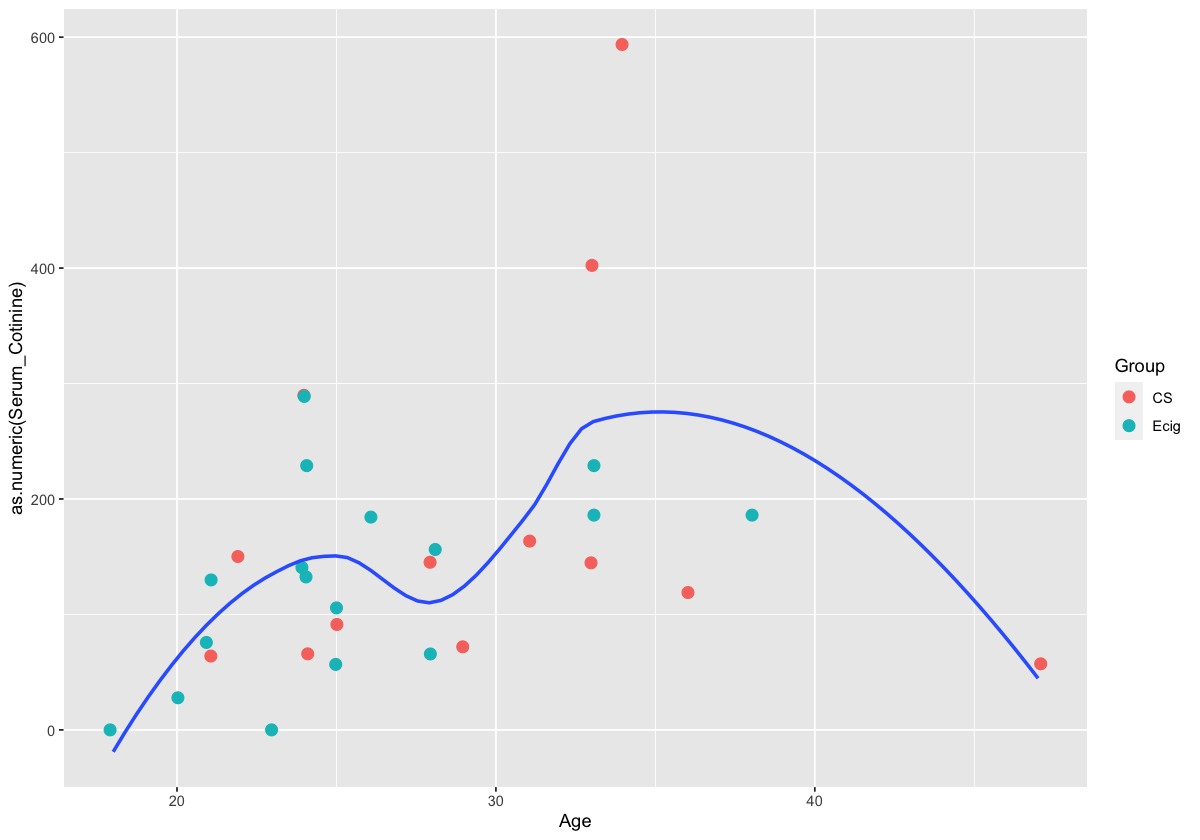

In [32]:
options(repr.plot.width=10, repr.plot.height=7) #changing size
ggplot(data = smokers_only, aes(x = Age, y = as.numeric(Serum_Cotinine))) + 
  geom_point(aes(color = Group),position = position_jitter(w = 0.1, h = 0), size = 3) +
  geom_smooth(method = 'loess', se = FALSE)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


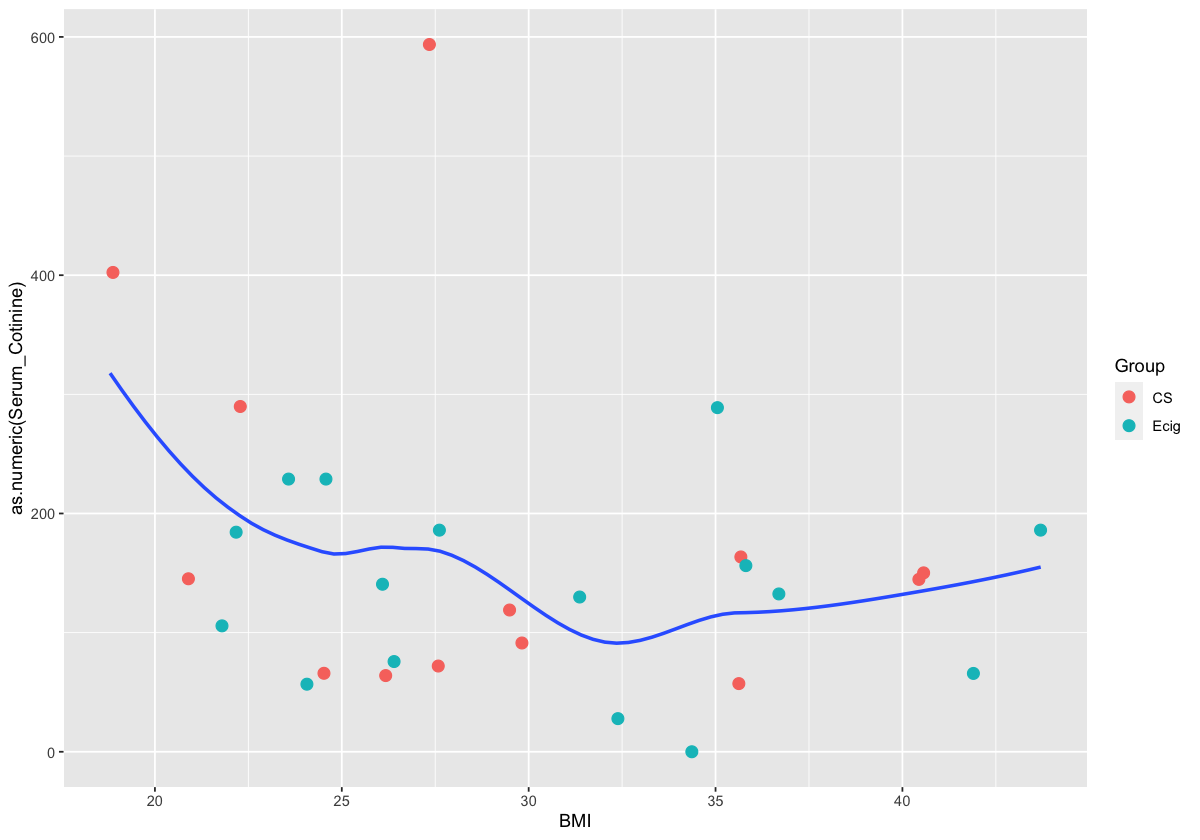

In [33]:
ggplot(data = smokers_only, aes(x = BMI, y = as.numeric(Serum_Cotinine))) + 
  geom_point(aes(color = Group),position = position_jitter(w = 0.1, h = 0), size = 3) +
  geom_smooth(method = 'loess', se = FALSE)

# Spearman's Correlations

Finding correlation between cytokine and cotinine concentrations in each compartment.

In [13]:
get_spearman_values = function(dataframe){
    spearman_cor = cor.test(dataframe$Conc_pslog2, dataframe$Cotinine, method = c('spearman'))
    spearman_coeff = spearman_cor$estimate
    pvalue = spearman_cor$p.value
    values_tuple = c(spearman_coeff, pvalue)
    return(values_tuple)
}

#NLF
Eotaxin_NLF_spearman = get_spearman_values(Eotaxin_Cotinine_NLF)
Eotaxin3_NLF_spearman = get_spearman_values(Eotaxin3_Cotinine_NLF)
Fractalkine_NLF_spearman = get_spearman_values(Fractalkine_Cotinine_NLF) 
I309_NLF_spearman = get_spearman_values(I309_Cotinine_NLF) 
IFNg_NLF_spearman = get_spearman_values(IFNg_Cotinine_NLF)
IL10_NLF_spearman = get_spearman_values(IL10_Cotinine_NLF)
IL12p70_NLF_spearman = get_spearman_values(IL12p70_Cotinine_NLF)
IL13_NLF_spearman = get_spearman_values(IL13_Cotinine_NLF) 
IL17B_NLF_spearman = get_spearman_values(IL17B_Cotinine_NLF)
IL17D_NLF_spearman = get_spearman_values(IL17D_Cotinine_NLF) 
IL1b_NLF_spearman = get_spearman_values(IL1b_Cotinine_NLF)
IL4_NLF_spearman = get_spearman_values(IL4_Cotinine_NLF) 
IL6_NLF_spearman = get_spearman_values(IL6_Cotinine_NLF) 
IL8_NLF_spearman = get_spearman_values(IL8_Cotinine_NLF) 
IP10_NLF_spearman = get_spearman_values(IP10_Cotinine_NLF) 
ITAC_NLF_spearman = get_spearman_values(ITAC_Cotinine_NLF) 
MCP1_NLF_spearman = get_spearman_values(MCP1_Cotinine_NLF) 
MIG_NLF_spearman = get_spearman_values(MIG_Cotinine_NLF) 
MIP1a_NLF_spearman = get_spearman_values(MIP1a_Cotinine_NLF) 
MIP1b_NLF_spearman = get_spearman_values(MIP1b_Cotinine_NLF) 
TARC_NLF_spearman = get_spearman_values(TARC_Cotinine_NLF)
TNFa_NLF_spearman = get_spearman_values(TNFa_Cotinine_NLF)

#ELF
Eotaxin_ELF_spearman = get_spearman_values(Eotaxin_Cotinine_ELF)
Eotaxin3_ELF_spearman = get_spearman_values(Eotaxin3_Cotinine_ELF)
Fractalkine_ELF_spearman = get_spearman_values(Fractalkine_Cotinine_ELF) 
I309_ELF_spearman = get_spearman_values(I309_Cotinine_ELF) 
IFNg_ELF_spearman = get_spearman_values(IFNg_Cotinine_ELF)
IL10_ELF_spearman = get_spearman_values(IL10_Cotinine_ELF)
IL12p70_ELF_spearman = get_spearman_values(IL12p70_Cotinine_ELF)
IL13_ELF_spearman = get_spearman_values(IL13_Cotinine_ELF) 
IL17B_ELF_spearman = get_spearman_values(IL17B_Cotinine_ELF)
IL17D_ELF_spearman = get_spearman_values(IL17D_Cotinine_ELF) 
IL1b_ELF_spearman = get_spearman_values(IL1b_Cotinine_ELF)
IL4_ELF_spearman = get_spearman_values(IL4_Cotinine_ELF) 
IL6_ELF_spearman = get_spearman_values(IL6_Cotinine_ELF) 
IL8_ELF_spearman = get_spearman_values(IL8_Cotinine_ELF) 
IP10_ELF_spearman = get_spearman_values(IP10_Cotinine_ELF) 
ITAC_ELF_spearman = get_spearman_values(ITAC_Cotinine_ELF) 
MCP1_ELF_spearman = get_spearman_values(MCP1_Cotinine_ELF) 
MIG_ELF_spearman = get_spearman_values(MIG_Cotinine_ELF) 
MIP1a_ELF_spearman = get_spearman_values(MIP1a_Cotinine_ELF) 
MIP1b_ELF_spearman = get_spearman_values(MIP1b_Cotinine_ELF) 
TARC_ELF_spearman = get_spearman_values(TARC_Cotinine_ELF)
TNFa_ELF_spearman = get_spearman_values(TNFa_Cotinine_ELF)

#Sputum
Eotaxin_Sputum_spearman = get_spearman_values(Eotaxin_Cotinine_Sputum)
Eotaxin3_Sputum_spearman = get_spearman_values(Eotaxin3_Cotinine_Sputum)
Fractalkine_Sputum_spearman = get_spearman_values(Fractalkine_Cotinine_Sputum) 
I309_Sputum_spearman = get_spearman_values(I309_Cotinine_Sputum) 
IFNg_Sputum_spearman = get_spearman_values(IFNg_Cotinine_Sputum)
IL10_Sputum_spearman = get_spearman_values(IL10_Cotinine_Sputum)
IL12p70_Sputum_spearman = get_spearman_values(IL12p70_Cotinine_Sputum)
IL13_Sputum_spearman = get_spearman_values(IL13_Cotinine_Sputum) 
IL17B_Sputum_spearman = get_spearman_values(IL17B_Cotinine_Sputum)
IL17D_Sputum_spearman = get_spearman_values(IL17D_Cotinine_Sputum) 
IL1b_Sputum_spearman = get_spearman_values(IL1b_Cotinine_Sputum)
IL4_Sputum_spearman = get_spearman_values(IL4_Cotinine_Sputum) 
IL6_Sputum_spearman = get_spearman_values(IL6_Cotinine_Sputum) 
IL8_Sputum_spearman = get_spearman_values(IL8_Cotinine_Sputum) 
IP10_Sputum_spearman = get_spearman_values(IP10_Cotinine_Sputum) 
ITAC_Sputum_spearman = get_spearman_values(ITAC_Cotinine_Sputum) 
MCP1_Sputum_spearman = get_spearman_values(MCP1_Cotinine_Sputum) 
MIG_Sputum_spearman = get_spearman_values(MIG_Cotinine_Sputum) 
MIP1a_Sputum_spearman = get_spearman_values(MIP1a_Cotinine_Sputum) 
MIP1b_Sputum_spearman = get_spearman_values(MIP1b_Cotinine_Sputum) 
TARC_Sputum_spearman = get_spearman_values(TARC_Cotinine_Sputum)
TNFa_Sputum_spearman = get_spearman_values(TNFa_Cotinine_Sputum)

#Serum
Eotaxin_Serum_spearman = get_spearman_values(Eotaxin_Cotinine_Serum)
Eotaxin3_Serum_spearman = get_spearman_values(Eotaxin3_Cotinine_Serum)
Fractalkine_Serum_spearman = get_spearman_values(Fractalkine_Cotinine_Serum) 
I309_Serum_spearman = get_spearman_values(I309_Cotinine_Serum) 
IFNg_Serum_spearman = get_spearman_values(IFNg_Cotinine_Serum)
IL10_Serum_spearman = get_spearman_values(IL10_Cotinine_Serum)
IL12p70_Serum_spearman = get_spearman_values(IL12p70_Cotinine_Serum)
IL13_Serum_spearman = get_spearman_values(IL13_Cotinine_Serum) 
IL17B_Serum_spearman = get_spearman_values(IL17B_Cotinine_Serum)
IL17D_Serum_spearman = get_spearman_values(IL17D_Cotinine_Serum) 
IL1b_Serum_spearman = get_spearman_values(IL1b_Cotinine_Serum)
IL4_Serum_spearman = get_spearman_values(IL4_Cotinine_Serum) 
IL6_Serum_spearman = get_spearman_values(IL6_Cotinine_Serum) 
IL8_Serum_spearman = get_spearman_values(IL8_Cotinine_Serum) 
IP10_Serum_spearman = get_spearman_values(IP10_Cotinine_Serum) 
ITAC_Serum_spearman = get_spearman_values(ITAC_Cotinine_Serum) 
MCP1_Serum_spearman = get_spearman_values(MCP1_Cotinine_Serum) 
MIG_Serum_spearman = get_spearman_values(MIG_Cotinine_Serum) 
MIP1a_Serum_spearman = get_spearman_values(MIP1a_Cotinine_Serum) 
MIP1b_Serum_spearman = get_spearman_values(MIP1b_Cotinine_Serum) 
TARC_Serum_spearman = get_spearman_values(TARC_Cotinine_Serum)
TNFa_Serum_spearman = get_spearman_values(TNFa_Cotinine_Serum)

Warning message in cor.test.default(dataframe$Conc_pslog2, dataframe$Cotinine, method = c("spearman")):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(dataframe$Conc_pslog2, dataframe$Cotinine, method = c("spearman")):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(dataframe$Conc_pslog2, dataframe$Cotinine, method = c("spearman")):
“Cannot compute exact p-value with ties”
Warning message in cor(rank(x), rank(y)):
“the standard deviation is zero”
Warning message in cor.test.default(dataframe$Conc_pslog2, dataframe$Cotinine, method = c("spearman")):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(dataframe$Conc_pslog2, dataframe$Cotinine, method = c("spearman")):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(dataframe$Conc_pslog2, dataframe$Cotinine, method = c("spearman")):
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(dataframe$Conc_pslo

In [14]:
#putting everything into a table
table_summary = function(Eotaxin, Eotaxin3, Fractalkine, I309,
                                           IFNg, IL10, IL12p70, IL13,
                                           IL17B, IL17D, IL1b, IL4, IL6,
                                           IL8, IP10, ITAC, MCP1, MIG,
                                           MIP1a, MIP1b, TARC, TNFa){
    #"""
    #Putting stats into a table(matrix) to make transfer to excel easier.

    #:param: none
    #:output: a 22x2 matrix containing statistic and p value. 
    #"""
    compartment_table = rbind(Eotaxin, Eotaxin3, Fractalkine, I309,
                                           IFNg, IL10, IL12p70, IL13,
                                           IL17B, IL17D, IL1b, IL4, IL6,
                                           IL8, IP10, ITAC, MCP1, MIG,
                                           MIP1a, MIP1b, TARC, TNFa)
    #compartment_stats_table = t(compartment_table)
    
    colnames(compartment_table) = c('Spearman Coefficient','p value')
    return(compartment_table)
}

In [16]:
NLF_Cotinine_table = table_summary(Eotaxin_NLF_spearman, Eotaxin3_NLF_spearman, Fractalkine_NLF_spearman,I309_NLF_spearman,
                            IFNg_NLF_spearman, IL10_NLF_spearman, IL12p70_NLF_spearman, IL13_NLF_spearman, 
                            IL17B_NLF_spearman, IL17D_NLF_spearman, IL1b_NLF_spearman, IL4_NLF_spearman, IL6_NLF_spearman,
                            IL8_NLF_spearman, IP10_NLF_spearman, ITAC_NLF_spearman, MCP1_NLF_spearman, MIG_NLF_spearman,
                            MIP1a_NLF_spearman, MIP1b_NLF_spearman, TARC_NLF_spearman, TNFa_NLF_spearman)
ELF_Cotinine_table = table_summary(Eotaxin_ELF_spearman, Eotaxin3_ELF_spearman, Fractalkine_ELF_spearman,I309_ELF_spearman,
                            IFNg_ELF_spearman, IL10_ELF_spearman, IL12p70_ELF_spearman, IL13_ELF_spearman, 
                            IL17B_ELF_spearman, IL17D_ELF_spearman, IL1b_ELF_spearman, IL4_ELF_spearman, IL6_ELF_spearman,
                            IL8_ELF_spearman, IP10_ELF_spearman, ITAC_ELF_spearman, MCP1_ELF_spearman, MIG_ELF_spearman,
                            MIP1a_ELF_spearman, MIP1b_ELF_spearman, TARC_ELF_spearman, TNFa_ELF_spearman)
                                   
Sputum_Cotinine_table = table_summary(Eotaxin_Sputum_spearman, Eotaxin3_Sputum_spearman, Fractalkine_Sputum_spearman,I309_Sputum_spearman,
                            IFNg_Sputum_spearman, IL10_Sputum_spearman, IL12p70_Sputum_spearman, IL13_Sputum_spearman, 
                            IL17B_Sputum_spearman, IL17D_Sputum_spearman, IL1b_Sputum_spearman, IL4_Sputum_spearman, IL6_Sputum_spearman,
                            IL8_Sputum_spearman, IP10_Sputum_spearman, ITAC_Sputum_spearman, MCP1_Sputum_spearman, MIG_Sputum_spearman,
                            MIP1a_Sputum_spearman, MIP1b_Sputum_spearman, TARC_Sputum_spearman, TNFa_Sputum_spearman)
                                   
Serum_Cotinine_table = table_summary(Eotaxin_Serum_spearman, Eotaxin3_Serum_spearman, Fractalkine_Serum_spearman,I309_Serum_spearman,
                            IFNg_Serum_spearman, IL10_Serum_spearman, IL12p70_Serum_spearman, IL13_Serum_spearman, 
                            IL17B_Serum_spearman, IL17D_Serum_spearman, IL1b_Serum_spearman, IL4_Serum_spearman, IL6_Serum_spearman,
                            IL8_Serum_spearman, IP10_Serum_spearman, ITAC_Serum_spearman, MCP1_Serum_spearman, MIG_Serum_spearman,
                            MIP1a_Serum_spearman, MIP1b_Serum_spearman, TARC_Serum_spearman, TNFa_Serum_spearman)
                                   
cotinine_table = cbind(NLF_Cotinine_table, ELF_Cotinine_table, Sputum_Cotinine_table, Serum_Cotinine_table)
cotinine_table

,Spearman Coefficient,p value,Spearman Coefficient,p value,Spearman Coefficient,p value,Spearman Coefficient,p value
Eotaxin,-0.240961176,0.19959106,-0.14306375,0.45073596,0.3314615528,0.07356376,0.169318056,0.371070744
Eotaxin3,-0.180887753,0.33877596,-0.16353321,0.38787222,0.3487683112,0.05890378,0.141522029,0.455680890
Fractalkine,-0.003337412,0.98603531,-0.33418623,0.07108555,0.1926799433,0.30767765,0.394259653,0.031093133
I309,NA,NA,-0.12262062,0.51858659,NA,NA,0.234621035,0.212039867
IFNg,-0.056124245,0.76831839,-0.12004895,0.52746057,0.4036183785,0.02697825,0.140171321,0.460036778
IL10,-0.367712506,0.04559477,-0.28034264,0.13347718,-0.1088480862,0.56694382,-0.114597241,0.546511355
IL12p70,-0.372838770,0.04244017,-0.25659886,0.17106931,0.2662547005,0.15497060,0.204551055,0.278239976
IL13,-0.136166426,0.47308060,-0.22338414,0.23538431,0.0483242547,0.79981692,0.115333477,0.543919918
IL17B,-0.333259154,0.07192139,-0.03159417,0.86836439,0.3533300061,0.05545017,0.172546152,0.361883805
IL17D,0.056694176,0.76603032,0.25103031,0.18087404,0.1249954337,0.51045720,0.160704836,0.396243766


# Least Squares Regression

I need to compare two continuous variables, cytokine concentration and cotinine concentration. So I will do a least squares regression. 

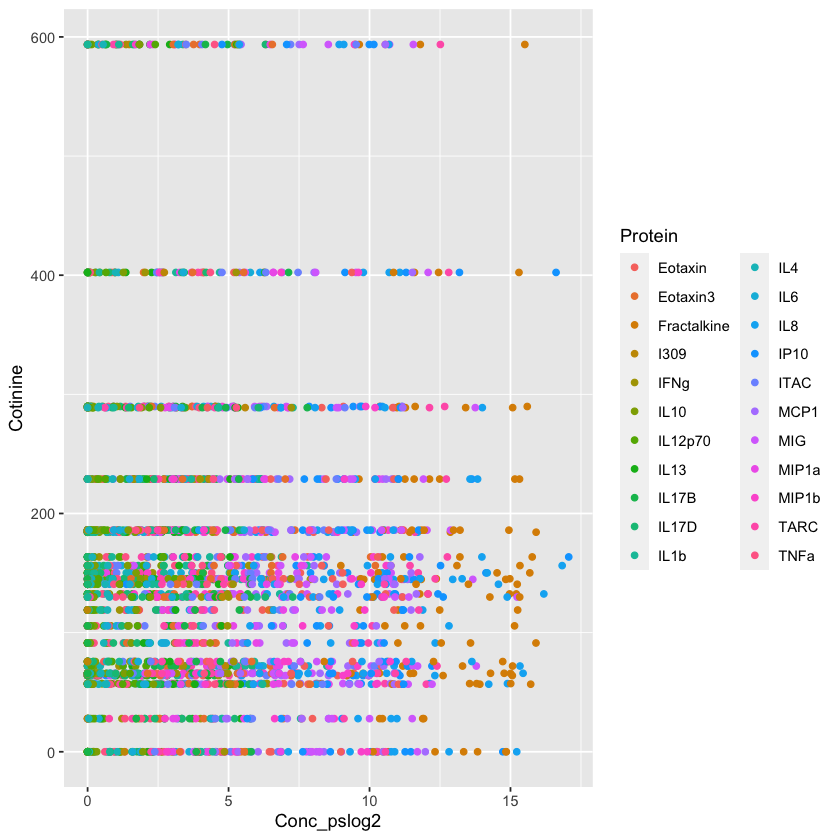

In [36]:
smokers_only = data_df %>%
 filter(Group != 'NS')

ggplot(data = smokers_only) + 
  geom_point(aes(x = Conc_pslog2, y = Cotinine, color = Protein))

In [ ]:
unique_Cotinine_levels = unique(smokers_only$Cotinine)

In [39]:
distinct(smokers_only, Cotinine, SubjectNo, Protein, Conc_pslog2) %>% head(22)

,Protein,Conc_pslog2,SubjectNo,Cotinine
,<chr>,<dbl>,<dbl>,<dbl>
1,IFNg,1.3644463,15,593.64
2,IL10,0.6344649,15,593.64
3,IL12p70,0.3927082,15,593.64
4,IL13,2.9131738,15,593.64
5,IL1b,1.6562877,15,593.64
6,IL6,1.0037763,15,593.64
7,TNFa,1.1582131,15,593.64
8,Eotaxin,6.3194188,15,593.64
9,Eotaxin3,3.9738365,15,593.64


In [4]:
get_cotinine_df = function(dataframe, protein, compartment){
    cotinine_df = data_df %>% filter(Group != 'NS', Protein == protein, Compartment == compartment)
}

#NLF
Eotaxin_Cotinine_NLF = get_cotinine_df(data_df,'Eotaxin','NLF')
Eotaxin3_Cotinine_NLF = get_cotinine_df(data_df,'Eotaxin3','NLF')
Fractalkine_Cotinine_NLF = get_cotinine_df(data_df,'Fractalkine','NLF')
I309_Cotinine_NLF = get_cotinine_df(data_df,'I309','NLF')
IFNg_Cotinine_NLF = get_cotinine_df(data_df,'IFNg','NLF')
IL10_Cotinine_NLF = get_cotinine_df(data_df,'IL10','NLF')
IL12p70_Cotinine_NLF = get_cotinine_df(data_df,'IL12p70','NLF')
IL13_Cotinine_NLF = get_cotinine_df(data_df,'IL13','NLF')
IL17B_Cotinine_NLF = get_cotinine_df(data_df,'IL17B','NLF')
IL17D_Cotinine_NLF = get_cotinine_df(data_df,'IL17D','NLF')
IL1b_Cotinine_NLF = get_cotinine_df(data_df,'IL1b','NLF')
IL4_Cotinine_NLF = get_cotinine_df(data_df,'IL4','NLF')
IL6_Cotinine_NLF = get_cotinine_df(data_df,'IL6','NLF')
IL8_Cotinine_NLF = get_cotinine_df(data_df,'IL8','NLF')
IP10_Cotinine_NLF = get_cotinine_df(data_df,'IP10','NLF')
ITAC_Cotinine_NLF = get_cotinine_df(data_df,'ITAC','NLF')
MCP1_Cotinine_NLF = get_cotinine_df(data_df,'MCP1','NLF')
MIG_Cotinine_NLF = get_cotinine_df(data_df,'MIG','NLF')
MIP1a_Cotinine_NLF = get_cotinine_df(data_df,'MIP1a','NLF')
MIP1b_Cotinine_NLF = get_cotinine_df(data_df,'MIP1b','NLF')
TARC_Cotinine_NLF = get_cotinine_df(data_df,'TARC','NLF')
TNFa_Cotinine_NLF = get_cotinine_df(data_df,'TNFa','NLF')  

#ELF
Eotaxin_Cotinine_ELF = get_cotinine_df(data_df,'Eotaxin','ELF')
Eotaxin3_Cotinine_ELF = get_cotinine_df(data_df,'Eotaxin3','ELF')
Fractalkine_Cotinine_ELF = get_cotinine_df(data_df,'Fractalkine','ELF')
I309_Cotinine_ELF = get_cotinine_df(data_df,'I309','ELF')
IFNg_Cotinine_ELF = get_cotinine_df(data_df,'IFNg','ELF')
IL10_Cotinine_ELF = get_cotinine_df(data_df,'IL10','ELF')
IL12p70_Cotinine_ELF = get_cotinine_df(data_df,'IL12p70','ELF')
IL13_Cotinine_ELF = get_cotinine_df(data_df,'IL13','ELF')
IL17B_Cotinine_ELF = get_cotinine_df(data_df,'IL17B','ELF')
IL17D_Cotinine_ELF = get_cotinine_df(data_df,'IL17D','ELF')
IL1b_Cotinine_ELF = get_cotinine_df(data_df,'IL1b','ELF')
IL4_Cotinine_ELF = get_cotinine_df(data_df,'IL4','ELF')
IL6_Cotinine_ELF = get_cotinine_df(data_df,'IL6','ELF')
IL8_Cotinine_ELF = get_cotinine_df(data_df,'IL8','ELF')
IP10_Cotinine_ELF = get_cotinine_df(data_df,'IP10','ELF')
ITAC_Cotinine_ELF = get_cotinine_df(data_df,'ITAC','ELF')
MCP1_Cotinine_ELF = get_cotinine_df(data_df,'MCP1','ELF')
MIG_Cotinine_ELF = get_cotinine_df(data_df,'MIG','ELF')
MIP1a_Cotinine_ELF = get_cotinine_df(data_df,'MIP1a','ELF')
MIP1b_Cotinine_ELF = get_cotinine_df(data_df,'MIP1b','ELF')
TARC_Cotinine_ELF = get_cotinine_df(data_df,'TARC','ELF')
TNFa_Cotinine_ELF = get_cotinine_df(data_df,'TNFa','ELF')  

#Sputum
Eotaxin_Cotinine_Sputum = get_cotinine_df(data_df,'Eotaxin','Sputum')
Eotaxin3_Cotinine_Sputum = get_cotinine_df(data_df,'Eotaxin3','Sputum')
Fractalkine_Cotinine_Sputum = get_cotinine_df(data_df,'Fractalkine','Sputum')
I309_Cotinine_Sputum = get_cotinine_df(data_df,'I309','Sputum')
IFNg_Cotinine_Sputum = get_cotinine_df(data_df,'IFNg','Sputum')
IL10_Cotinine_Sputum = get_cotinine_df(data_df,'IL10','Sputum')
IL12p70_Cotinine_Sputum = get_cotinine_df(data_df,'IL12p70','Sputum')
IL13_Cotinine_Sputum = get_cotinine_df(data_df,'IL13','Sputum')
IL17B_Cotinine_Sputum = get_cotinine_df(data_df,'IL17B','Sputum')
IL17D_Cotinine_Sputum = get_cotinine_df(data_df,'IL17D','Sputum')
IL1b_Cotinine_Sputum = get_cotinine_df(data_df,'IL1b','Sputum')
IL4_Cotinine_Sputum = get_cotinine_df(data_df,'IL4','Sputum')
IL6_Cotinine_Sputum = get_cotinine_df(data_df,'IL6','Sputum')
IL8_Cotinine_Sputum = get_cotinine_df(data_df,'IL8','Sputum')
IP10_Cotinine_Sputum = get_cotinine_df(data_df,'IP10','Sputum')
ITAC_Cotinine_Sputum = get_cotinine_df(data_df,'ITAC','Sputum')
MCP1_Cotinine_Sputum = get_cotinine_df(data_df,'MCP1','Sputum')
MIG_Cotinine_Sputum = get_cotinine_df(data_df,'MIG','Sputum')
MIP1a_Cotinine_Sputum = get_cotinine_df(data_df,'MIP1a','Sputum')
MIP1b_Cotinine_Sputum = get_cotinine_df(data_df,'MIP1b','Sputum')
TARC_Cotinine_Sputum = get_cotinine_df(data_df,'TARC','Sputum')
TNFa_Cotinine_Sputum = get_cotinine_df(data_df,'TNFa','Sputum')  

#Serum
Eotaxin_Cotinine_Serum = get_cotinine_df(data_df,'Eotaxin','Serum')
Eotaxin3_Cotinine_Serum = get_cotinine_df(data_df,'Eotaxin3','Serum')
Fractalkine_Cotinine_Serum = get_cotinine_df(data_df,'Fractalkine','Serum')
I309_Cotinine_Serum = get_cotinine_df(data_df,'I309','Serum')
IFNg_Cotinine_Serum = get_cotinine_df(data_df,'IFNg','Serum')
IL10_Cotinine_Serum = get_cotinine_df(data_df,'IL10','Serum')
IL12p70_Cotinine_Serum = get_cotinine_df(data_df,'IL12p70','Serum')
IL13_Cotinine_Serum = get_cotinine_df(data_df,'IL13','Serum')
IL17B_Cotinine_Serum = get_cotinine_df(data_df,'IL17B','Serum')
IL17D_Cotinine_Serum = get_cotinine_df(data_df,'IL17D','Serum')
IL1b_Cotinine_Serum = get_cotinine_df(data_df,'IL1b','Serum')
IL4_Cotinine_Serum = get_cotinine_df(data_df,'IL4','Serum')
IL6_Cotinine_Serum = get_cotinine_df(data_df,'IL6','Serum')
IL8_Cotinine_Serum = get_cotinine_df(data_df,'IL8','Serum')
IP10_Cotinine_Serum = get_cotinine_df(data_df,'IP10','Serum')
ITAC_Cotinine_Serum = get_cotinine_df(data_df,'ITAC','Serum')
MCP1_Cotinine_Serum = get_cotinine_df(data_df,'MCP1','Serum')
MIG_Cotinine_Serum = get_cotinine_df(data_df,'MIG','Serum')
MIP1a_Cotinine_Serum = get_cotinine_df(data_df,'MIP1a','Serum')
MIP1b_Cotinine_Serum = get_cotinine_df(data_df,'MIP1b','Serum')
TARC_Cotinine_Serum = get_cotinine_df(data_df,'TARC','Serum')
TNFa_Cotinine_Serum = get_cotinine_df(data_df,'TNFa','Serum')  

In [53]:
#linear model
get_linear_model = function(cotinine_df){
    fit = lm(cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)
    fit_summary = summary(fit)
    return(fit_summary)
}

#NLF
Eotaxin_lm_NLF = get_linear_model(Eotaxin_Cotinine_NLF)
Eotaxin3_lm_NLF = get_linear_model(Eotaxin3_Cotinine_NLF)
Fractalkine_lm_NLF = get_linear_model(Fractalkine_Cotinine_NLF)
I309_lm_NLF = get_linear_model(I309_Cotinine_NLF)
IFNg_lm_NLF = get_linear_model(IFNg_Cotinine_NLF)
IL10_lm_NLF = get_linear_model(IL10_Cotinine_NLF)
IL12p70_lm_NLF = get_linear_model(IL12p70_Cotinine_NLF)
IL13_lm_NLF = get_linear_model(IL13_Cotinine_NLF)
IL17B_lm_NLF = get_linear_model(IL17B_Cotinine_NLF)
IL17D_lm_NLF = get_linear_model(IL17D_Cotinine_NLF)
IL1b_lm_NLF = get_linear_model(IL1b_Cotinine_NLF)
IL4_lm_NLF = get_linear_model(IL4_Cotinine_NLF)
IL6_lm_NLF = get_linear_model(IL6_Cotinine_NLF)
IL8_lm_NLF = get_linear_model(IL8_Cotinine_NLF)
IP10_lm_NLF = get_linear_model(IP10_Cotinine_NLF)
ITAC_lm_NLF = get_linear_model(ITAC_Cotinine_NLF)
MCP1_lm_NLF = get_linear_model(MCP1_Cotinine_NLF)
MIG_lm_NLF = get_linear_model(MIG_Cotinine_NLF)
MIP1a_lm_NLF = get_linear_model(MIP1a_Cotinine_NLF)
MIP1b_lm_NLF = get_linear_model(MIP1b_Cotinine_NLF)
TARC_lm_NLF = get_linear_model(TARC_Cotinine_NLF)
TNFa_lm_NLF = get_linear_model(TNFa_Cotinine_NLF)

#ELF
Eotaxin_lm_ELF = get_linear_model(Eotaxin_Cotinine_ELF)
Eotaxin3_lm_ELF = get_linear_model(Eotaxin3_Cotinine_ELF)
Fractalkine_lm_ELF = get_linear_model(Fractalkine_Cotinine_ELF)
I309_lm_ELF = get_linear_model(I309_Cotinine_ELF)
IFNg_lm_ELF = get_linear_model(IFNg_Cotinine_ELF)
IL10_lm_ELF = get_linear_model(IL10_Cotinine_ELF)
IL12p70_lm_ELF = get_linear_model(IL12p70_Cotinine_ELF)
IL13_lm_ELF = get_linear_model(IL13_Cotinine_ELF)
IL17B_lm_ELF = get_linear_model(IL17B_Cotinine_ELF)
IL17D_lm_ELF = get_linear_model(IL17D_Cotinine_ELF)
IL1b_lm_ELF = get_linear_model(IL1b_Cotinine_ELF)
IL4_lm_ELF = get_linear_model(IL4_Cotinine_ELF)
IL6_lm_ELF = get_linear_model(IL6_Cotinine_ELF)
IL8_lm_ELF = get_linear_model(IL8_Cotinine_ELF)
IP10_lm_ELF = get_linear_model(IP10_Cotinine_ELF)
ITAC_lm_ELF = get_linear_model(ITAC_Cotinine_ELF)
MCP1_lm_ELF = get_linear_model(MCP1_Cotinine_ELF)
MIG_lm_ELF = get_linear_model(MIG_Cotinine_ELF)
MIP1a_lm_ELF = get_linear_model(MIP1a_Cotinine_ELF)
MIP1b_lm_ELF = get_linear_model(MIP1b_Cotinine_ELF)
TARC_lm_ELF = get_linear_model(TARC_Cotinine_ELF)
TNFa_lm_ELF = get_linear_model(TNFa_Cotinine_ELF)

#Sputum
Eotaxin_lm_Sputum = get_linear_model(Eotaxin_Cotinine_Sputum)
Eotaxin3_lm_Sputum = get_linear_model(Eotaxin3_Cotinine_Sputum)
Fractalkine_lm_Sputum = get_linear_model(Fractalkine_Cotinine_Sputum)
I309_lm_Sputum = get_linear_model(I309_Cotinine_Sputum)
IFNg_lm_Sputum = get_linear_model(IFNg_Cotinine_Sputum)
IL10_lm_Sputum = get_linear_model(IL10_Cotinine_Sputum)
IL12p70_lm_Sputum = get_linear_model(IL12p70_Cotinine_Sputum)
IL13_lm_Sputum = get_linear_model(IL13_Cotinine_Sputum)
IL17B_lm_Sputum = get_linear_model(IL17B_Cotinine_Sputum)
IL17D_lm_Sputum = get_linear_model(IL17D_Cotinine_Sputum)
IL1b_lm_Sputum = get_linear_model(IL1b_Cotinine_Sputum)
IL4_lm_Sputum = get_linear_model(IL4_Cotinine_Sputum)
IL6_lm_Sputum = get_linear_model(IL6_Cotinine_Sputum)
IL8_lm_Sputum = get_linear_model(IL8_Cotinine_Sputum)
IP10_lm_Sputum = get_linear_model(IP10_Cotinine_Sputum)
ITAC_lm_Sputum = get_linear_model(ITAC_Cotinine_Sputum)
MCP1_lm_Sputum = get_linear_model(MCP1_Cotinine_Sputum)
MIG_lm_Sputum = get_linear_model(MIG_Cotinine_Sputum)
MIP1a_lm_Sputum = get_linear_model(MIP1a_Cotinine_Sputum)
MIP1b_lm_Sputum = get_linear_model(MIP1b_Cotinine_Sputum)
TARC_lm_Sputum = get_linear_model(TARC_Cotinine_Sputum)
TNFa_lm_Sputum = get_linear_model(TNFa_Cotinine_Sputum)

#Serum
Eotaxin_lm_Serum = get_linear_model(Eotaxin_Cotinine_Serum)
Eotaxin3_lm_Serum = get_linear_model(Eotaxin3_Cotinine_Serum)
Fractalkine_lm_Serum = get_linear_model(Fractalkine_Cotinine_Serum)
I309_lm_Serum = get_linear_model(I309_Cotinine_Serum)
IFNg_lm_Serum = get_linear_model(IFNg_Cotinine_Serum)
IL10_lm_Serum = get_linear_model(IL10_Cotinine_Serum)
IL12p70_lm_Serum = get_linear_model(IL12p70_Cotinine_Serum)
IL13_lm_Serum = get_linear_model(IL13_Cotinine_Serum)
IL17B_lm_Serum = get_linear_model(IL17B_Cotinine_Serum)
IL17D_lm_Serum = get_linear_model(IL17D_Cotinine_Serum)
IL1b_lm_Serum = get_linear_model(IL1b_Cotinine_Serum)
IL4_lm_Serum = get_linear_model(IL4_Cotinine_Serum)
IL6_lm_Serum = get_linear_model(IL6_Cotinine_Serum)
IL8_lm_Serum = get_linear_model(IL8_Cotinine_Serum)
IP10_lm_Serum = get_linear_model(IP10_Cotinine_Serum)
ITAC_lm_Serum = get_linear_model(ITAC_Cotinine_Serum)
MCP1_lm_Serum = get_linear_model(MCP1_Cotinine_Serum)
MIG_lm_Serum = get_linear_model(MIG_Cotinine_Serum)
MIP1a_lm_Serum = get_linear_model(MIP1a_Cotinine_Serum)
MIP1b_lm_Serum = get_linear_model(MIP1b_Cotinine_Serum)
TARC_lm_Serum = get_linear_model(TARC_Cotinine_Serum)
TNFa_lm_Serum = get_linear_model(TNFa_Cotinine_Serum)


Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
     Min       1Q   Median       3Q      Max 
-190.751  -77.772    7.874   63.731  275.850 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               383.68      71.49   5.367 1.02e-05 ***
cotinine_df$Conc_pslog2   -49.54      14.71  -3.367  0.00222 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 104.9 on 28 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2628 
F-statistic: 11.34 on 1 and 28 DF,  p-value: 0.002221



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-156.22  -81.78   -9.30   25.99  435.84 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)               234.56     145.57   1.611    0.118
cotinine_df$Conc_pslog2   -12.15      21.09  -0.576    0.569

Residual standard error: 123.7 on 28 degrees of freedom
Multiple R-squared:  0.01171,	Adjusted R-squared:  -0.02359 
F-statistic: 0.3316 on 1 and 28 DF,  p-value: 0.5693



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-168.24  -73.95  -32.94   33.41  405.88 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)               108.99      32.30   3.375  0.00218 **
cotinine_df$Conc_pslog2    22.64      12.75   1.776  0.08656 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 117.9 on 28 degrees of freedom
Multiple R-squared:  0.1013,	Adjusted R-squared:  0.06917 
F-statistic: 3.155 on 1 and 28 DF,  p-value: 0.08656



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-169.33  -70.92  -26.71   42.33  417.60 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)               -66.52     191.92  -0.347    0.731
cotinine_df$Conc_pslog2    22.97      20.06   1.145    0.262

Residual standard error: 121.6 on 28 degrees of freedom
Multiple R-squared:  0.04472,	Adjusted R-squared:  0.01061 
F-statistic: 1.311 on 1 and 28 DF,  p-value: 0.2619


In [67]:
Eotaxin_lm_Serum 
Eotaxin3_lm_Serum
Fractalkine_lm_Serum 
I309_lm_Serum 
IFNg_lm_Serum
IL10_lm_Serum
IL12p70_lm_Serum
IL13_lm_Serum 
IL17B_lm_Serum
IL17D_lm_Serum 
IL1b_lm_Serum
IL4_lm_Serum 
IL6_lm_Serum 
IL8_lm_Serum 
IP10_lm_Serum 
ITAC_lm_Serum 
MCP1_lm_Serum 
MIG_lm_Serum 
MIP1a_lm_Serum 
MIP1b_lm_Serum 
TARC_lm_Serum
TNFa_lm_Serum


Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-169.33  -70.92  -26.71   42.33  417.60 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)               -66.52     191.92  -0.347    0.731
cotinine_df$Conc_pslog2    22.97      20.06   1.145    0.262

Residual standard error: 121.6 on 28 degrees of freedom
Multiple R-squared:  0.04472,	Adjusted R-squared:  0.01061 
F-statistic: 1.311 on 1 and 28 DF,  p-value: 0.2619



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-153.66  -77.79  -22.10   30.13  434.34 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)              122.198     65.757   1.858   0.0737 .
cotinine_df$Conc_pslog2    5.662     11.832   0.479   0.6360  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123.9 on 28 degrees of freedom
Multiple R-squared:  0.008113,	Adjusted R-squared:  -0.02731 
F-statistic: 0.229 on 1 and 28 DF,  p-value: 0.636



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-147.34  -81.14  -19.64   28.68  427.47 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)              -278.02     377.09  -0.737    0.467
cotinine_df$Conc_pslog2    28.64      25.09   1.142    0.263

Residual standard error: 121.6 on 28 degrees of freedom
Multiple R-squared:  0.04448,	Adjusted R-squared:  0.01035 
F-statistic: 1.303 on 1 and 28 DF,  p-value: 0.2633



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.13  -59.92  -20.34   36.34  375.89 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              118.823     27.325   4.349 0.000164 ***
cotinine_df$Conc_pslog2   18.929      9.813   1.929 0.063933 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 116.9 on 28 degrees of freedom
Multiple R-squared:  0.1173,	Adjusted R-squared:  0.08577 
F-statistic: 3.721 on 1 and 28 DF,  p-value: 0.06393



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-158.26  -78.25  -27.72   46.73  438.88 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                81.68      93.10   0.877    0.388
cotinine_df$Conc_pslog2    13.68      17.64   0.776    0.445

Residual standard error: 123.1 on 28 degrees of freedom
Multiple R-squared:  0.02103,	Adjusted R-squared:  -0.01393 
F-statistic: 0.6015 on 1 and 28 DF,  p-value: 0.4445



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-151.08  -84.52  -16.79   31.70  442.16 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)              157.713     47.959   3.288  0.00272 **
cotinine_df$Conc_pslog2   -3.386     23.974  -0.141  0.88870   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 124.4 on 28 degrees of freedom
Multiple R-squared:  0.0007119,	Adjusted R-squared:  -0.03498 
F-statistic: 0.01995 on 1 and 28 DF,  p-value: 0.8887



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-123.39  -68.83  -36.53   44.36  400.62 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)               123.39      31.04   3.975  0.00045 ***
cotinine_df$Conc_pslog2    29.01      22.35   1.298  0.20484    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 120.8 on 28 degrees of freedom
Multiple R-squared:  0.05677,	Adjusted R-squared:  0.02308 
F-statistic: 1.685 on 1 and 28 DF,  p-value: 0.2048



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-170.15  -72.13  -25.58   30.56  408.07 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)               121.69      37.60   3.236  0.00311 **
cotinine_df$Conc_pslog2    12.06      12.14   0.993  0.32899   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 122.3 on 28 degrees of freedom
Multiple R-squared:  0.03405,	Adjusted R-squared:  -0.0004494 
F-statistic: 0.987 on 1 and 28 DF,  p-value: 0.329



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-184.01  -64.62  -19.50   41.09  403.49 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)              120.616     27.948   4.316 0.000179 ***
cotinine_df$Conc_pslog2   16.636      9.502   1.751 0.090928 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 118.1 on 28 degrees of freedom
Multiple R-squared:  0.09867,	Adjusted R-squared:  0.06648 
F-statistic: 3.065 on 1 and 28 DF,  p-value: 0.09093



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-150.77  -68.68  -21.09   44.75  376.24 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)              109.970     30.376   3.620  0.00115 **
cotinine_df$Conc_pslog2   17.030      8.815   1.932  0.06353 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 116.9 on 28 degrees of freedom
Multiple R-squared:  0.1176,	Adjusted R-squared:  0.08612 
F-statistic: 3.733 on 1 and 28 DF,  p-value: 0.06353



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-151.95  -84.29  -15.13   33.97  442.05 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             151.5893    26.9755   5.620 5.12e-06 ***
cotinine_df$Conc_pslog2   0.4523    41.9351   0.011    0.991    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 124.4 on 28 degrees of freedom
Multiple R-squared:  4.155e-06,	Adjusted R-squared:  -0.03571 
F-statistic: 0.0001163 on 1 and 28 DF,  p-value: 0.9915



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-151.42  -83.75  -14.92   31.10  440.93 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)               158.66      57.07   2.780  0.00961 **
cotinine_df$Conc_pslog2   -10.85      82.20  -0.132  0.89596   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 124.4 on 28 degrees of freedom
Multiple R-squared:  0.0006215,	Adjusted R-squared:  -0.03507 
F-statistic: 0.01741 on 1 and 28 DF,  p-value: 0.896



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-165.94  -71.56  -18.67   58.76  426.16 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)               102.79      51.09   2.012   0.0539 .
cotinine_df$Conc_pslog2    20.16      18.93   1.065   0.2961  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 122 on 28 degrees of freedom
Multiple R-squared:  0.03891,	Adjusted R-squared:  0.004588 
F-statistic: 1.134 on 1 and 28 DF,  p-value: 0.2961



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-149.00  -84.32  -14.45   30.88  439.47 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)              173.225    155.322   1.115    0.274
cotinine_df$Conc_pslog2   -3.543     25.346  -0.140    0.890

Residual standard error: 124.4 on 28 degrees of freedom
Multiple R-squared:  0.0006974,	Adjusted R-squared:  -0.03499 
F-statistic: 0.01954 on 1 and 28 DF,  p-value: 0.8898



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-159.11  -82.32  -16.51   33.66  445.33 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)               74.971    206.726   0.363    0.720
cotinine_df$Conc_pslog2    7.339     19.643   0.374    0.711

Residual standard error: 124.1 on 28 degrees of freedom
Multiple R-squared:  0.004961,	Adjusted R-squared:  -0.03058 
F-statistic: 0.1396 on 1 and 28 DF,  p-value: 0.7115



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-155.31  -75.06  -14.97   47.77  380.57 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)                1.619     88.194   0.018   0.9855  
cotinine_df$Conc_pslog2   22.197     12.644   1.755   0.0901 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 118.1 on 28 degrees of freedom
Multiple R-squared:  0.09915,	Adjusted R-squared:  0.06698 
F-statistic: 3.082 on 1 and 28 DF,  p-value: 0.09011



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-176.18  -73.95  -25.53   47.13  443.49 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)               -43.56     255.32  -0.171    0.866
cotinine_df$Conc_pslog2    18.34      23.89   0.768    0.449

Residual standard error: 123.1 on 28 degrees of freedom
Multiple R-squared:  0.02063,	Adjusted R-squared:  -0.01435 
F-statistic: 0.5897 on 1 and 28 DF,  p-value: 0.449



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-149.32  -67.37  -12.58   29.33  398.21 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)               10.717     89.589   0.120    0.906
cotinine_df$Conc_pslog2   15.987      9.853   1.623    0.116

Residual standard error: 118.9 on 28 degrees of freedom
Multiple R-squared:  0.08594,	Adjusted R-squared:  0.0533 
F-statistic: 2.633 on 1 and 28 DF,  p-value: 0.1159



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-153.44  -84.92  -15.49   33.55  441.47 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)  
(Intercept)             146.6167    77.7455   1.886   0.0697 .
cotinine_df$Conc_pslog2   0.8576    12.4311   0.069   0.9455  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 124.4 on 28 degrees of freedom
Multiple R-squared:  0.00017,	Adjusted R-squared:  -0.03554 
F-statistic: 0.00476 on 1 and 28 DF,  p-value: 0.9455



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-152.83  -83.44  -13.99   34.10  442.46 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)              116.820    224.226   0.521    0.606
cotinine_df$Conc_pslog2    3.631     23.188   0.157    0.877

Residual standard error: 124.3 on 28 degrees of freedom
Multiple R-squared:  0.0008747,	Adjusted R-squared:  -0.03481 
F-statistic: 0.02451 on 1 and 28 DF,  p-value: 0.8767



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-137.53  -63.08  -16.52   17.78  378.43 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)   
(Intercept)              -378.62     192.32  -1.969  0.05896 . 
cotinine_df$Conc_pslog2    47.46      17.11   2.773  0.00977 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 110.2 on 28 degrees of freedom
Multiple R-squared:  0.2155,	Adjusted R-squared:  0.1874 
F-statistic: 7.689 on 1 and 28 DF,  p-value: 0.00977



Call:
lm(formula = cotinine_df$Cotinine ~ cotinine_df$Conc_pslog2)

Residuals:
    Min      1Q  Median      3Q     Max 
-160.34  -79.84  -24.24   35.63  438.77 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                81.81     126.30   0.648    0.522
cotinine_df$Conc_pslog2    16.22      28.82   0.563    0.578

Residual standard error: 123.7 on 28 degrees of freedom
Multiple R-squared:  0.01119,	Adjusted R-squared:  -0.02413 
F-statistic: 0.3168 on 1 and 28 DF,  p-value: 0.578


# Plotting

In [71]:
ggplot() +
  geom_point(data = Eotaxin_Cotinine_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
  geom_smooth(data = Eotaxin_Cotinine_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
              se = FALSE) + 
   geom_point(data = IL17B_lm_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
   geom_smooth(data = IL17B_lm_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
              se = FALSE) #+ 
#   geom_point(data = IL1b_lm_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = IL1b_lm_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   geom_point(data = MIP1b_lm_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = MIP1b_lm_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   geom_point(data = TARC_lm_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = TARC_lm_NLF, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   geom_point(data = IL1b_lm_ELF, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = IL1b_lm_ELF, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   geom_point(data = IL6_lm_ELF , aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = IL6_lm_ELF , aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   geom_point(data = MIP1b_lm_ELF, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = MIP1b_lm_ELF, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   geom_point(data = TARC_lm_ELF, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = TARC_lm_ELF, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   geom_point(data = Eotaxin3_lm_Sputum, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = Eotaxin3_lm_Sputum, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   geom_point(data = TARC_lm_Serum, aes(y = Conc_pslog2, x = Cotinine, color = Protein)) + 
#   geom_smooth(data = TARC_lm_Serum, aes(y = Conc_pslog2, x = Cotinine, color = Protein), method = 'lm',
#              se = FALSE) + 
#   facet_wrap(~ Compartment)

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not an S3 object with class summary.lm


`geom_smooth()` using formula 'y ~ x'



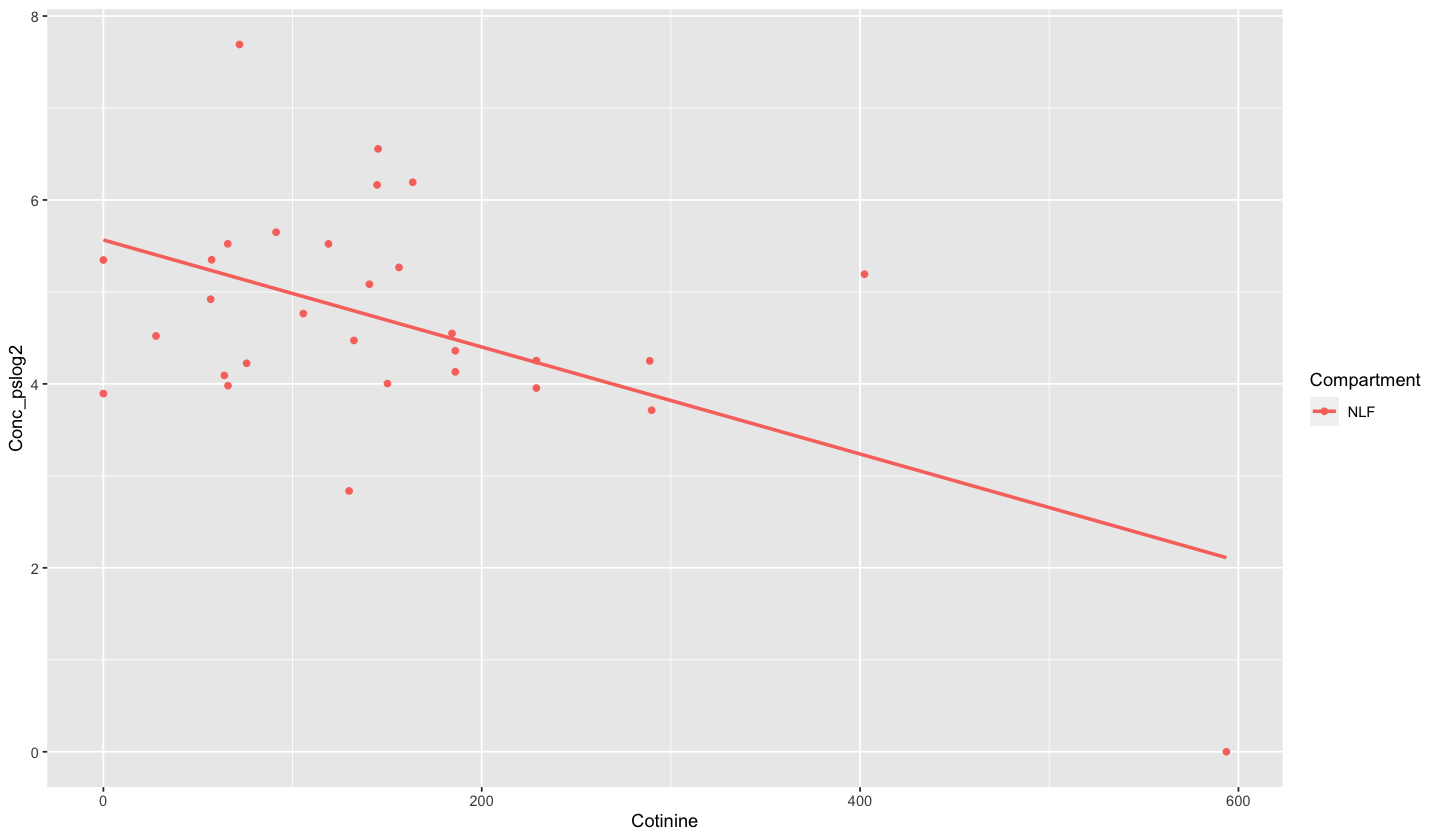

In [63]:
example_Eotaxin = data_df %>%
    filter(Group != 'NS', Compartment == 'NLF', Protein == 'Eotaxin')

options(repr.plot.width=12, repr.plot.height=7) #changing size
ggplot() +
  geom_point(data = example_Eotaxin, aes(y = Conc_pslog2, x = Cotinine, color = Compartment)) + 
  geom_smooth(data = example_Eotaxin, aes(y = Conc_pslog2, x = Cotinine, color = Compartment), method = 'lm',
             se = FALSE)